In [5]:
%matplotlib nbagg
%load_ext autoreload
%autoreload

/Users/jerry/anaconda3/envs/saferew/lib/python3.6/site-packages/jax/lib/xla_bridge.py:115: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [6]:
import gym
import time, copy
import jax.numpy as np
import rdb.envs.drive2d
import rdb.optim.open as opt_open
import matplotlib
matplotlib.use('nbagg')
from matplotlib import pyplot as plt
from tqdm.notebook import trange, tqdm

In [26]:
env = gym.make("Week3_01-v0")
obs = env.reset()
main_car = env.main_car
udim = 2
horizon = 10
y0_idx, y1_idx = 1, 5
T = 30

# Scenario 1

In [27]:
weights = {
    "dist_cars": 100.0,
    "dist_lanes": 10.0,
    "dist_fences": 200.0,
    "speed": 4.0,
    "control": 80.0,
}
cost_fn = main_car.build_cost_fn(env.cost_features, weights)
opt_fn = opt_open.optimize_u_fn(env.dynamics_fn, cost_fn, udim, horizon, env.dt)

state = copy.deepcopy(env.state)
state[y0_idx] = 0.4
state[y1_idx] = -0.2
env.state = state

In [28]:
## Utility function
from ipywidgets import interact, interactive, fixed

def browse_images(images):
    n = len(images)
    fig = plt.figure()
    plt.show()
    def view_image(i):
        plt.imshow(images[i])
    interact(view_image, i=(0, n-1))

In [29]:
## Define optimization for scenario
opt_fn = opt_open.optimize_u_fn(env.dynamics_fn, cost_fn, udim, horizon, env.dt)

In [30]:
## Find optimal 
opt_u, c_min, info = opt_fn(np.ones((horizon, udim)) * 0., env.state)

In [22]:
total_cost = 0
images = []
for t in tqdm(range(T)):
    opt_u, c_min, info = opt_fn(np.ones((horizon, udim)) * 0., env.state)
    action = opt_u[0]
    print(action)
    cost = main_car.cost_fn(env.state, action)
    total_cost += cost
    env.step(action)
    arr = env.render("rgb_array")
    images.append(arr)
    r_max = -1 * c_min
    #time.sleep(0.2)


[0.00526661 0.0603152 ]
[-0.00346416  0.06018811]
[9.64110377e-05 5.96190710e-02]
[-0.00017646  0.05960892]
[0.00059423 0.06091869]
[0.00104536 0.05915155]
[-0.00187411  0.05946949]
[-0.00194663  0.0594026 ]
[0.00237115 0.06106082]
[0.00048984 0.0604426 ]
[-0.00199816  0.06006941]
[0.00222974 0.06005813]
[0.00032809 0.0591591 ]
[-0.00101504  0.06006828]
[0.00192657 0.06012103]
[-0.0001066   0.06049144]
[-0.00440747  0.05973368]
[4.38002662e-06 6.04121323e-02]
[0.00296242 0.06006282]
[0.00261715 0.05919595]
[-0.00224951  0.05990875]
[-0.0016574   0.06016693]
[0.0009883  0.05991875]
[-0.00081257  0.06018774]
[0.00080932 0.05995789]
[-0.00298657  0.05991493]
[0.00402626 0.05991315]
[-0.00010919  0.0605834 ]
[-0.0011136   0.06019979]
[7.58087638e-05 5.99265755e-02]



<IPython.core.display.Javascript object>


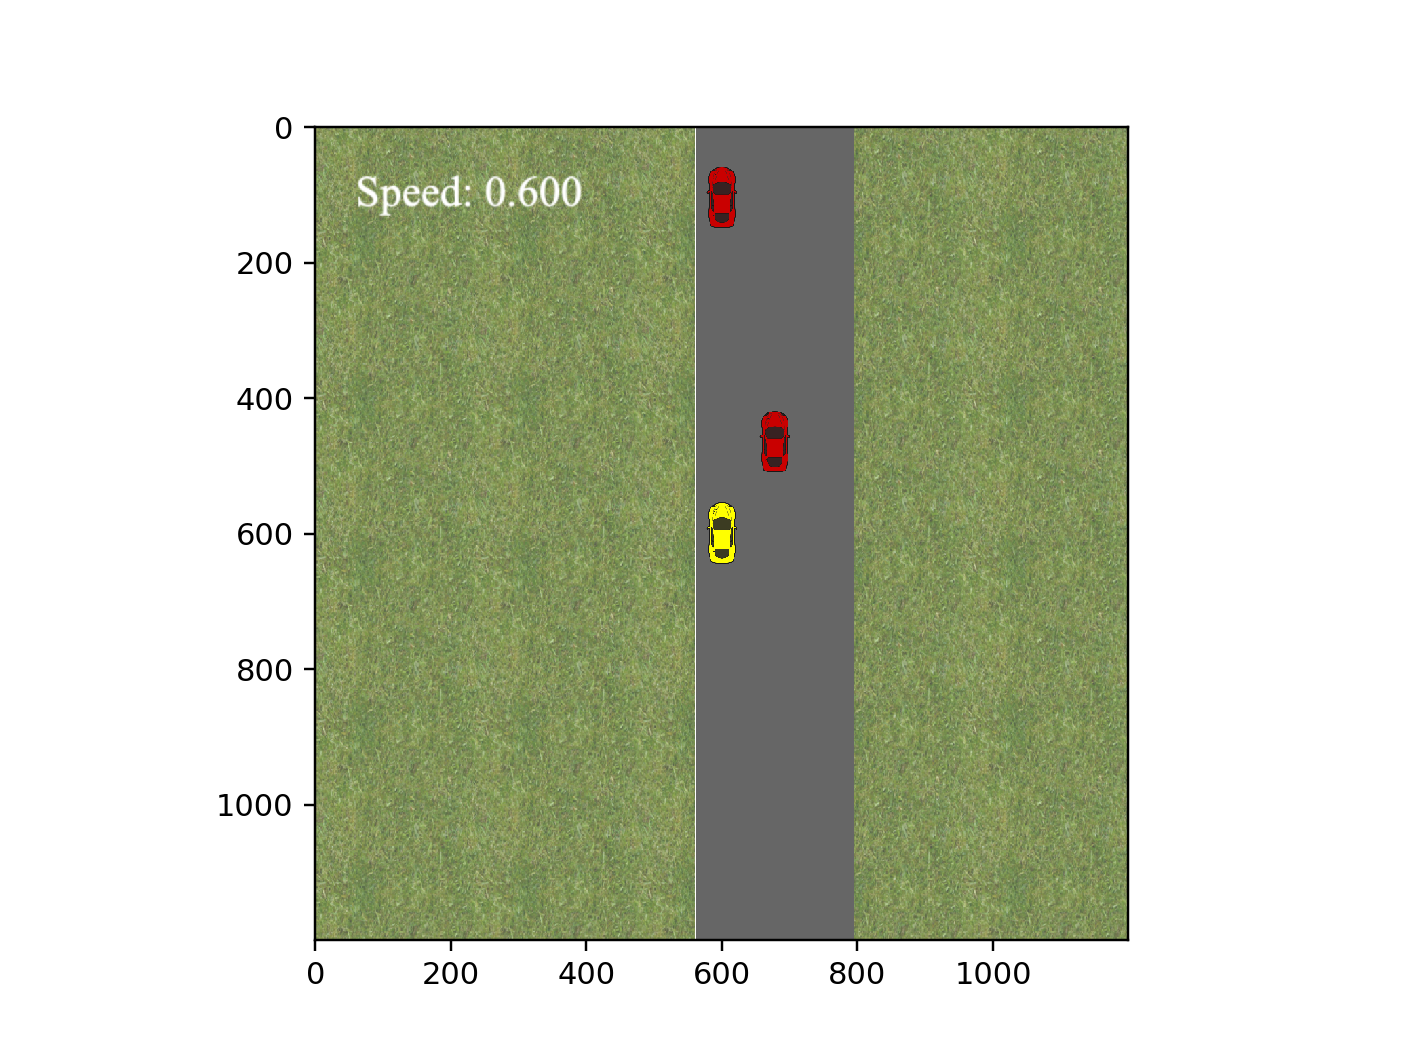

interactive(children=(IntSlider(value=14, description='i', max=29), Output()), _dom_classes=('widget-interact'…

In [23]:
browse_images(images)

In [3]:
from tqdm.notebook import trange
from time import sleep

for i in trange(4, desc='1st loop'):
    for j in trange(5, desc='2nd loop', leave=False):
        for k in trange(50, desc='3nd loop', leave=False):
            sleep(0.01)